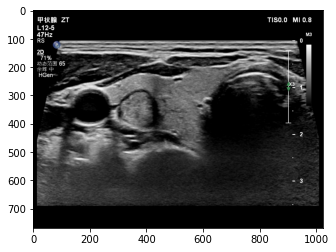

In [1]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/root/workspace/Thyroid_Solid_Nodule/data/preprocess/chenzhou_aug/tests/A4B1C2D1E1_20235241120181012THY14920181012112622945T.jpg')
# plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [2]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmcv import Config
import copy
import os.path as osp
import os
import mmcv
import numpy as np
import time

os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5"

cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_chenzhou.py')
cfg.work_dir = 'logs/faster_rcnn_r50_fpn_1x_chenzhou_' + time.strftime("%Y%m%d%H%M", time.localtime()) + '/'
cfg.gpu_ids = range(1)
cfg.seed = 0
cfg.total_epochs = 50
cfg.log_config.interval = 1000
# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.45s)
creating index...
index created!


2020-09-02 03:43:30,836 - mmdet - INFO - load model from: torchvision://resnet50
2020-09-02 03:43:31,220 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2020-09-02 03:43:34,681 - mmdet - INFO - Start running, host: root@358d280dcc22, work_dir: /root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343
2020-09-02 03:43:34,682 - mmdet - INFO - workflow: [('train', 1)], max: 50 epochs


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2020-09-02 03:52:32,418 - mmdet - INFO - Epoch [1][1000/6291]	lr: 2.000e-02, eta: 1 day, 22:49:18, time: 0.538, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0369, loss_rpn_bbox: 0.0087, loss_cls: 0.1524, acc: 96.6289, loss_bbox: 0.0948, loss: 0.2928
2020-09-02 04:01:20,437 - mmdet - INFO - Epoch [1][2000/6291]	lr: 2.000e-02, eta: 1 day, 22:15:25, time: 0.528, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0068, loss_cls: 0.0856, acc: 96.9822, loss_bbox: 0.1005, loss: 0.2034
2020-09-02 04:10:03,732 - mmdet - INFO - Epoch [1][3000/6291]	lr: 2.000e-02, eta: 1 day, 21:50:05, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0071, loss_rpn_bbox: 0.0056, loss_cls: 0.0675, acc: 97.5289, loss_bbox: 0.0877, loss: 0.1680
2020-09-02 04:18:46,343 - mmdet - INFO - Epoch [1][4000/6291]	lr: 2.000e-02, eta: 1 day, 21:32:10, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0054, loss_rpn_bbox: 0.0052, loss_cls: 0.0535, acc: 97.9919, loss_bbox: 0.0752, l

[>>>>                              ] 2/15, 5.5 task/s, elapsed: 0s, ETA:     2s

/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/mmdet/core/post_processing/bbox_nms.py:52: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629416375/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  labels = valid_mask.nonzero()[:, 1]


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 04:38:51,936 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...


2020-09-02 04:38:51,976 - mmdet - INFO - Epoch [1][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4460, bbox_mAP_50: 0.8800, bbox_mAP_75: 0.3940, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5020, bbox_mAP_l: 0.4490, bbox_mAP_copypaste: 0.446 0.880 0.394 -1.000 0.502 0.449


DONE (t=0.02s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.446
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.880
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.394
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.502
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.449
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.617
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.542


2020-09-02 04:47:37,614 - mmdet - INFO - Epoch [2][1000/6291]	lr: 2.000e-02, eta: 1 day, 19:09:47, time: 0.525, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0042, loss_cls: 0.0322, acc: 98.7365, loss_bbox: 0.0576, loss: 0.0965
2020-09-02 04:56:19,126 - mmdet - INFO - Epoch [2][2000/6291]	lr: 2.000e-02, eta: 1 day, 19:11:04, time: 0.522, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0040, loss_cls: 0.0316, acc: 98.7579, loss_bbox: 0.0555, loss: 0.0937
2020-09-02 05:04:59,498 - mmdet - INFO - Epoch [2][3000/6291]	lr: 2.000e-02, eta: 1 day, 19:09:35, time: 0.520, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0017, loss_rpn_bbox: 0.0038, loss_cls: 0.0292, acc: 98.8524, loss_bbox: 0.0539, loss: 0.0886
2020-09-02 05:13:41,056 - mmdet - INFO - Epoch [2][4000/6291]	lr: 2.000e-02, eta: 1 day, 19:07:17, time: 0.522, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0040, loss_cls: 0.0294, acc: 98.8325, loss_bbox: 0.0558, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.8 task/s, elapsed: 2s, ETA:     0s

2020-09-02 05:33:43,577 - mmdet - INFO - Evaluating bbox...
2020-09-02 05:33:43,607 - mmdet - INFO - Epoch [2][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4870, bbox_mAP_50: 0.8210, bbox_mAP_75: 0.5190, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3460, bbox_mAP_l: 0.5580, bbox_mAP_copypaste: 0.487 0.821 0.519 -1.000 0.346 0.558


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.487
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.821
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.519
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.346
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.578
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.578
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.578
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 05:42:32,704 - mmdet - INFO - Epoch [3][1000/6291]	lr: 2.000e-02, eta: 1 day, 18:00:29, time: 0.529, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0016, loss_rpn_bbox: 0.0035, loss_cls: 0.0203, acc: 99.1718, loss_bbox: 0.0455, loss: 0.0709
2020-09-02 05:51:19,845 - mmdet - INFO - Epoch [3][2000/6291]	lr: 2.000e-02, eta: 1 day, 18:00:34, time: 0.527, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0008, loss_rpn_bbox: 0.0031, loss_cls: 0.0204, acc: 99.1537, loss_bbox: 0.0437, loss: 0.0680
2020-09-02 06:00:02,602 - mmdet - INFO - Epoch [3][3000/6291]	lr: 2.000e-02, eta: 1 day, 17:58:06, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0008, loss_rpn_bbox: 0.0030, loss_cls: 0.0211, acc: 99.1181, loss_bbox: 0.0460, loss: 0.0710
2020-09-02 06:08:46,290 - mmdet - INFO - Epoch [3][4000/6291]	lr: 2.000e-02, eta: 1 day, 17:55:10, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0008, loss_rpn_bbox: 0.0030, loss_cls: 0.0186, acc: 99.2415, loss_bbox: 0.0410, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 06:28:46,975 - mmdet - INFO - Evaluating bbox...
2020-09-02 06:28:47,002 - mmdet - INFO - Epoch [3][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4410, bbox_mAP_50: 0.7150, bbox_mAP_75: 0.4350, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4460, bbox_mAP_l: 0.4590, bbox_mAP_copypaste: 0.441 0.715 0.435 -1.000 0.446 0.459


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.441
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.715
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.435
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.446
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.459
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.517
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.517
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.517
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 06:37:29,909 - mmdet - INFO - Epoch [4][1000/6291]	lr: 2.000e-02, eta: 1 day, 17:02:50, time: 0.523, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0028, loss_cls: 0.0197, acc: 99.2037, loss_bbox: 0.0402, loss: 0.0636
2020-09-02 06:46:14,515 - mmdet - INFO - Epoch [4][2000/6291]	lr: 2.000e-02, eta: 1 day, 16:59:54, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0031, loss_cls: 0.0244, acc: 99.0379, loss_bbox: 0.0440, loss: 0.0730
2020-09-02 06:54:56,969 - mmdet - INFO - Epoch [4][3000/6291]	lr: 2.000e-02, eta: 1 day, 16:55:58, time: 0.522, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0027, loss_cls: 0.0173, acc: 99.2879, loss_bbox: 0.0382, loss: 0.0591
2020-09-02 07:03:40,319 - mmdet - INFO - Epoch [4][4000/6291]	lr: 2.000e-02, eta: 1 day, 16:51:47, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0025, loss_cls: 0.0150, acc: 99.3679, loss_bbox: 0.0343, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 07:23:44,707 - mmdet - INFO - Evaluating bbox...
2020-09-02 07:23:44,738 - mmdet - INFO - Epoch [4][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4510, bbox_mAP_50: 0.8240, bbox_mAP_75: 0.2870, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5080, bbox_mAP_l: 0.4380, bbox_mAP_copypaste: 0.451 0.824 0.287 -1.000 0.508 0.438


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.451
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.824
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.287
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.508
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.438
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 07:32:28,282 - mmdet - INFO - Epoch [5][1000/6291]	lr: 2.000e-02, eta: 1 day, 16:08:13, time: 0.523, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0024, loss_cls: 0.0117, acc: 99.5121, loss_bbox: 0.0300, loss: 0.0446
2020-09-02 07:41:09,513 - mmdet - INFO - Epoch [5][2000/6291]	lr: 2.000e-02, eta: 1 day, 16:03:25, time: 0.521, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0024, loss_cls: 0.0117, acc: 99.5048, loss_bbox: 0.0288, loss: 0.0434
2020-09-02 07:49:54,885 - mmdet - INFO - Epoch [5][3000/6291]	lr: 2.000e-02, eta: 1 day, 15:59:03, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0013, loss_rpn_bbox: 0.0028, loss_cls: 0.0201, acc: 99.2180, loss_bbox: 0.0391, loss: 0.0632
2020-09-02 07:58:38,068 - mmdet - INFO - Epoch [5][4000/6291]	lr: 2.000e-02, eta: 1 day, 15:54:02, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0028, loss_cls: 0.0189, acc: 99.2323, loss_bbox: 0.0384, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 08:18:36,941 - mmdet - INFO - Evaluating bbox...
2020-09-02 08:18:36,969 - mmdet - INFO - Epoch [5][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4520, bbox_mAP_50: 0.7950, bbox_mAP_75: 0.4660, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3730, bbox_mAP_l: 0.5160, bbox_mAP_copypaste: 0.452 0.795 0.466 -1.000 0.373 0.516


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.452
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.795
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.466
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.373
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.516
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.500
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.500
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 08:27:22,783 - mmdet - INFO - Epoch [6][1000/6291]	lr: 2.000e-02, eta: 1 day, 15:13:52, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0024, loss_cls: 0.0134, acc: 99.4424, loss_bbox: 0.0319, loss: 0.0481
2020-09-02 08:36:08,570 - mmdet - INFO - Epoch [6][2000/6291]	lr: 2.000e-02, eta: 1 day, 15:09:02, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0018, loss_rpn_bbox: 0.0030, loss_cls: 0.0233, acc: 99.1050, loss_bbox: 0.0395, loss: 0.0676
2020-09-02 08:44:51,660 - mmdet - INFO - Epoch [6][3000/6291]	lr: 2.000e-02, eta: 1 day, 15:03:37, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0008, loss_rpn_bbox: 0.0026, loss_cls: 0.0158, acc: 99.3468, loss_bbox: 0.0359, loss: 0.0552
2020-09-02 08:53:35,337 - mmdet - INFO - Epoch [6][4000/6291]	lr: 2.000e-02, eta: 1 day, 14:58:06, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0023, loss_cls: 0.0138, acc: 99.4155, loss_bbox: 0.0315, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-02 09:13:42,757 - mmdet - INFO - Evaluating bbox...
2020-09-02 09:13:42,784 - mmdet - INFO - Epoch [6][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4800, bbox_mAP_50: 0.8320, bbox_mAP_75: 0.5590, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4380, bbox_mAP_l: 0.5040, bbox_mAP_copypaste: 0.480 0.832 0.559 -1.000 0.438 0.504


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.480
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.832
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.559
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.438
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.504
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.506
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.506
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.506
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 09:22:27,323 - mmdet - INFO - Epoch [7][1000/6291]	lr: 2.000e-02, eta: 1 day, 14:21:13, time: 0.524, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0004, loss_rpn_bbox: 0.0021, loss_cls: 0.0125, acc: 99.4777, loss_bbox: 0.0301, loss: 0.0451
2020-09-02 09:31:10,046 - mmdet - INFO - Epoch [7][2000/6291]	lr: 2.000e-02, eta: 1 day, 14:15:25, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0023, loss_cls: 0.0124, acc: 99.4796, loss_bbox: 0.0299, loss: 0.0453
2020-09-02 09:39:57,410 - mmdet - INFO - Epoch [7][3000/6291]	lr: 2.000e-02, eta: 1 day, 14:10:00, time: 0.527, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0026, loss_cls: 0.0168, acc: 99.3183, loss_bbox: 0.0347, loss: 0.0550
2020-09-02 09:48:40,234 - mmdet - INFO - Epoch [7][4000/6291]	lr: 2.000e-02, eta: 1 day, 14:03:55, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0023, loss_cls: 0.0127, acc: 99.4653, loss_bbox: 0.0309, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.1 task/s, elapsed: 2s, ETA:     0s

2020-09-02 10:08:42,609 - mmdet - INFO - Evaluating bbox...
2020-09-02 10:08:42,638 - mmdet - INFO - Epoch [7][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4480, bbox_mAP_50: 0.7470, bbox_mAP_75: 0.4920, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3810, bbox_mAP_l: 0.5070, bbox_mAP_copypaste: 0.448 0.747 0.492 -1.000 0.381 0.507


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.448
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.747
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.492
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.381
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.507
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.517
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.517
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.517
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 10:17:27,025 - mmdet - INFO - Epoch [8][1000/6291]	lr: 2.000e-02, eta: 1 day, 13:28:21, time: 0.524, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0024, loss_cls: 0.0138, acc: 99.4283, loss_bbox: 0.0324, loss: 0.0491
2020-09-02 10:26:10,593 - mmdet - INFO - Epoch [8][2000/6291]	lr: 2.000e-02, eta: 1 day, 13:22:14, time: 0.524, data_time: 0.007, memory: 3172, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0024, loss_cls: 0.0154, acc: 99.3718, loss_bbox: 0.0319, loss: 0.0503
2020-09-02 10:34:54,019 - mmdet - INFO - Epoch [8][3000/6291]	lr: 2.000e-02, eta: 1 day, 13:16:01, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0023, loss_cls: 0.0141, acc: 99.4200, loss_bbox: 0.0316, loss: 0.0486
2020-09-02 10:43:39,548 - mmdet - INFO - Epoch [8][4000/6291]	lr: 2.000e-02, eta: 1 day, 13:09:52, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0025, loss_cls: 0.0167, acc: 99.3189, loss_bbox: 0.0340, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-02 11:03:39,145 - mmdet - INFO - Evaluating bbox...
2020-09-02 11:03:39,173 - mmdet - INFO - Epoch [8][6291/6291]	lr: 2.000e-02, bbox_mAP: 0.4310, bbox_mAP_50: 0.7720, bbox_mAP_75: 0.3650, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3930, bbox_mAP_l: 0.4670, bbox_mAP_copypaste: 0.431 0.772 0.365 -1.000 0.393 0.467


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.431
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.772
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.365
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.393
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.467
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.467
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.467
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.467
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 11:12:27,496 - mmdet - INFO - Epoch [9][1000/6291]	lr: 2.000e-03, eta: 1 day, 12:35:33, time: 0.528, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0015, loss_cls: 0.0099, acc: 99.5931, loss_bbox: 0.0222, loss: 0.0339
2020-09-02 11:21:10,802 - mmdet - INFO - Epoch [9][2000/6291]	lr: 2.000e-03, eta: 1 day, 12:29:07, time: 0.523, data_time: 0.007, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0013, loss_cls: 0.0088, acc: 99.6314, loss_bbox: 0.0203, loss: 0.0307
2020-09-02 11:29:53,097 - mmdet - INFO - Epoch [9][3000/6291]	lr: 2.000e-03, eta: 1 day, 12:22:31, time: 0.522, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0013, loss_cls: 0.0086, acc: 99.6411, loss_bbox: 0.0194, loss: 0.0296
2020-09-02 11:38:36,799 - mmdet - INFO - Epoch [9][4000/6291]	lr: 2.000e-03, eta: 1 day, 12:15:57, time: 0.524, data_time: 0.007, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0013, loss_cls: 0.0085, acc: 99.6411, loss_bbox: 0.0188, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-02 11:58:38,966 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.488
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.832
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.577
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.406
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 11:58:38,994 - mmdet - INFO - Epoch [9][6291/6291]	lr: 2.000e-03, bbox_mAP: 0.4880, bbox_mAP_50: 0.8320, bbox_mAP_75: 0.5770, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4060, bbox_mAP_l: 0.5390, bbox_mAP_copypaste: 0.488 0.832 0.577 -1.000 0.406 0.539
2020-09-02 12:07:25,118 - mmdet - INFO - Epoch [10][1000/6291]	lr: 2.000e-03, eta: 1 day, 11:42:39, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0012, loss_cls: 0.0077, acc: 99.6770, loss_bbox: 0.0174, loss: 0.0264
2020-09-02 12:16:08,937 - mmdet - INFO - Epoch [10][2000/6291]	lr: 2.000e-03, eta: 1 day, 11:36:01, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0012, loss_cls: 0.0075, acc: 99.6829, loss_bbox: 0.0173, loss: 0.0263
2020-09-02 12:24:52,245 - mmdet - INFO - Epoch [10][3000/6291]	lr: 2.000e-03, eta: 1 day, 11:29:16, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0013, loss_cls: 0.0077, acc: 99.6729, loss_bbox: 0.01

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 12:53:40,029 - mmdet - INFO - Evaluating bbox...
2020-09-02 12:53:40,058 - mmdet - INFO - Epoch [10][6291/6291]	lr: 2.000e-03, bbox_mAP: 0.4920, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5230, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5600, bbox_mAP_copypaste: 0.492 0.828 0.523 -1.000 0.392 0.560


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.492
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.523
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 13:02:27,421 - mmdet - INFO - Epoch [11][1000/6291]	lr: 2.000e-03, eta: 1 day, 10:50:07, time: 0.527, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0071, acc: 99.7078, loss_bbox: 0.0162, loss: 0.0247
2020-09-02 13:11:13,469 - mmdet - INFO - Epoch [11][2000/6291]	lr: 2.000e-03, eta: 1 day, 10:43:25, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0071, acc: 99.7018, loss_bbox: 0.0159, loss: 0.0242
2020-09-02 13:19:56,612 - mmdet - INFO - Epoch [11][3000/6291]	lr: 2.000e-03, eta: 1 day, 10:36:29, time: 0.523, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0069, acc: 99.7198, loss_bbox: 0.0161, loss: 0.0242
2020-09-02 13:28:40,138 - mmdet - INFO - Epoch [11][4000/6291]	lr: 2.000e-03, eta: 1 day, 10:29:31, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0069, acc: 99.7151, loss_bbox: 0.015

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-02 13:48:45,286 - mmdet - INFO - Evaluating bbox...
2020-09-02 13:48:45,316 - mmdet - INFO - Epoch [11][6291/6291]	lr: 2.000e-03, bbox_mAP: 0.5080, bbox_mAP_50: 0.8320, bbox_mAP_75: 0.5150, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5850, bbox_mAP_copypaste: 0.508 0.832 0.515 -1.000 0.392 0.585


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.508
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.832
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.515
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.585
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 13:57:30,579 - mmdet - INFO - Epoch [12][1000/6291]	lr: 2.000e-04, eta: 1 day, 9:57:39, time: 0.525, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0067, acc: 99.7188, loss_bbox: 0.0152, loss: 0.0231
2020-09-02 14:06:12,431 - mmdet - INFO - Epoch [12][2000/6291]	lr: 2.000e-04, eta: 1 day, 9:50:33, time: 0.522, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0068, acc: 99.7187, loss_bbox: 0.0149, loss: 0.0230
2020-09-02 14:14:56,785 - mmdet - INFO - Epoch [12][3000/6291]	lr: 2.000e-04, eta: 1 day, 9:43:31, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0065, acc: 99.7319, loss_bbox: 0.0147, loss: 0.0223
2020-09-02 14:23:40,377 - mmdet - INFO - Epoch [12][4000/6291]	lr: 2.000e-04, eta: 1 day, 9:36:25, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0065, acc: 99.7306, loss_bbox: 0.0147, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 14:43:39,988 - mmdet - INFO - Evaluating bbox...
2020-09-02 14:43:40,016 - mmdet - INFO - Epoch [12][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5170, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5970, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4220, bbox_mAP_l: 0.5720, bbox_mAP_copypaste: 0.517 0.828 0.597 -1.000 0.422 0.572


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.517
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.597
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.422
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.572
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 14:52:26,079 - mmdet - INFO - Epoch [13][1000/6291]	lr: 2.000e-04, eta: 1 day, 9:04:49, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0065, acc: 99.7307, loss_bbox: 0.0146, loss: 0.0222
2020-09-02 15:01:10,891 - mmdet - INFO - Epoch [13][2000/6291]	lr: 2.000e-04, eta: 1 day, 8:57:44, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0064, acc: 99.7384, loss_bbox: 0.0145, loss: 0.0221
2020-09-02 15:09:53,999 - mmdet - INFO - Epoch [13][3000/6291]	lr: 2.000e-04, eta: 1 day, 8:50:31, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0067, acc: 99.7227, loss_bbox: 0.0150, loss: 0.0230
2020-09-02 15:18:38,216 - mmdet - INFO - Epoch [13][4000/6291]	lr: 2.000e-04, eta: 1 day, 8:43:19, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0066, acc: 99.7325, loss_bbox: 0.0145, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 15:38:51,159 - mmdet - INFO - Evaluating bbox...
2020-09-02 15:38:51,186 - mmdet - INFO - Epoch [13][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5030, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5300, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4080, bbox_mAP_l: 0.5600, bbox_mAP_copypaste: 0.503 0.828 0.530 -1.000 0.408 0.560


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.530
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.408
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 15:47:36,125 - mmdet - INFO - Epoch [14][1000/6291]	lr: 2.000e-04, eta: 1 day, 8:12:42, time: 0.525, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0065, acc: 99.7304, loss_bbox: 0.0143, loss: 0.0219
2020-09-02 15:56:19,580 - mmdet - INFO - Epoch [14][2000/6291]	lr: 2.000e-04, eta: 1 day, 8:05:26, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7387, loss_bbox: 0.0142, loss: 0.0216
2020-09-02 16:05:04,128 - mmdet - INFO - Epoch [14][3000/6291]	lr: 2.000e-04, eta: 1 day, 7:58:10, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0065, acc: 99.7328, loss_bbox: 0.0141, loss: 0.0217
2020-09-02 16:13:48,425 - mmdet - INFO - Epoch [14][4000/6291]	lr: 2.000e-04, eta: 1 day, 7:50:51, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0066, acc: 99.7241, loss_bbox: 0.0145, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 16:33:51,367 - mmdet - INFO - Evaluating bbox...
2020-09-02 16:33:51,397 - mmdet - INFO - Epoch [14][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5110, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5930, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4220, bbox_mAP_l: 0.5630, bbox_mAP_copypaste: 0.511 0.828 0.593 -1.000 0.422 0.563


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.511
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.593
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.422
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.563
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 16:42:37,340 - mmdet - INFO - Epoch [15][1000/6291]	lr: 2.000e-04, eta: 1 day, 7:20:11, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0063, acc: 99.7449, loss_bbox: 0.0143, loss: 0.0217
2020-09-02 16:51:21,139 - mmdet - INFO - Epoch [15][2000/6291]	lr: 2.000e-04, eta: 1 day, 7:12:49, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0063, acc: 99.7355, loss_bbox: 0.0147, loss: 0.0222
2020-09-02 17:00:03,487 - mmdet - INFO - Epoch [15][3000/6291]	lr: 2.000e-04, eta: 1 day, 7:05:22, time: 0.522, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0063, acc: 99.7434, loss_bbox: 0.0143, loss: 0.0217
2020-09-02 17:08:47,799 - mmdet - INFO - Epoch [15][4000/6291]	lr: 2.000e-04, eta: 1 day, 6:57:58, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0063, acc: 99.7354, loss_bbox: 0.0141, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 17:28:50,209 - mmdet - INFO - Evaluating bbox...
2020-09-02 17:28:50,237 - mmdet - INFO - Epoch [15][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4970, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4080, bbox_mAP_l: 0.5490, bbox_mAP_copypaste: 0.497 0.828 0.524 -1.000 0.408 0.549


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.497
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.408
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.549
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 17:37:37,265 - mmdet - INFO - Epoch [16][1000/6291]	lr: 2.000e-04, eta: 1 day, 6:27:34, time: 0.527, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7541, loss_bbox: 0.0141, loss: 0.0213
2020-09-02 17:46:24,336 - mmdet - INFO - Epoch [16][2000/6291]	lr: 2.000e-04, eta: 1 day, 6:20:15, time: 0.527, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7479, loss_bbox: 0.0139, loss: 0.0211
2020-09-02 17:55:09,433 - mmdet - INFO - Epoch [16][3000/6291]	lr: 2.000e-04, eta: 1 day, 6:12:49, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0064, acc: 99.7324, loss_bbox: 0.0143, loss: 0.0219
2020-09-02 18:03:53,500 - mmdet - INFO - Epoch [16][4000/6291]	lr: 2.000e-04, eta: 1 day, 6:05:19, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7423, loss_bbox: 0.0141, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.8 task/s, elapsed: 2s, ETA:     0s

2020-09-02 18:24:02,696 - mmdet - INFO - Evaluating bbox...
2020-09-02 18:24:02,725 - mmdet - INFO - Epoch [16][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5030, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5300, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4080, bbox_mAP_l: 0.5610, bbox_mAP_copypaste: 0.503 0.828 0.530 -1.000 0.408 0.561


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.530
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.408
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.561
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 18:32:51,774 - mmdet - INFO - Epoch [17][1000/6291]	lr: 2.000e-04, eta: 1 day, 5:35:31, time: 0.529, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7494, loss_bbox: 0.0140, loss: 0.0212
2020-09-02 18:41:43,775 - mmdet - INFO - Epoch [17][2000/6291]	lr: 2.000e-04, eta: 1 day, 5:28:16, time: 0.532, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7384, loss_bbox: 0.0141, loss: 0.0214
2020-09-02 18:50:28,955 - mmdet - INFO - Epoch [17][3000/6291]	lr: 2.000e-04, eta: 1 day, 5:20:45, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7595, loss_bbox: 0.0139, loss: 0.0210
2020-09-02 18:59:13,963 - mmdet - INFO - Epoch [17][4000/6291]	lr: 2.000e-04, eta: 1 day, 5:13:12, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0064, acc: 99.7354, loss_bbox: 0.0143, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 19:19:26,568 - mmdet - INFO - Evaluating bbox...
2020-09-02 19:19:26,595 - mmdet - INFO - Epoch [17][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5000, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5390, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4290, bbox_mAP_l: 0.5490, bbox_mAP_copypaste: 0.500 0.828 0.539 -1.000 0.429 0.549


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.539
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.429
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.549
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 19:28:12,271 - mmdet - INFO - Epoch [18][1000/6291]	lr: 2.000e-04, eta: 1 day, 4:43:32, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7515, loss_bbox: 0.0140, loss: 0.0213
2020-09-02 19:37:01,556 - mmdet - INFO - Epoch [18][2000/6291]	lr: 2.000e-04, eta: 1 day, 4:36:05, time: 0.529, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7497, loss_bbox: 0.0140, loss: 0.0212
2020-09-02 19:45:47,903 - mmdet - INFO - Epoch [18][3000/6291]	lr: 2.000e-04, eta: 1 day, 4:28:32, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7444, loss_bbox: 0.0140, loss: 0.0214
2020-09-02 19:54:31,165 - mmdet - INFO - Epoch [18][4000/6291]	lr: 2.000e-04, eta: 1 day, 4:20:52, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0064, acc: 99.7364, loss_bbox: 0.0145, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 20:14:36,272 - mmdet - INFO - Evaluating bbox...
2020-09-02 20:14:36,300 - mmdet - INFO - Epoch [18][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5030, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4080, bbox_mAP_l: 0.5600, bbox_mAP_copypaste: 0.503 0.828 0.524 -1.000 0.408 0.560


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.408
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 20:23:28,713 - mmdet - INFO - Epoch [19][1000/6291]	lr: 2.000e-04, eta: 1 day, 3:51:24, time: 0.532, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7554, loss_bbox: 0.0139, loss: 0.0211
2020-09-02 20:32:12,723 - mmdet - INFO - Epoch [19][2000/6291]	lr: 2.000e-04, eta: 1 day, 3:43:44, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7475, loss_bbox: 0.0139, loss: 0.0211
2020-09-02 20:40:58,626 - mmdet - INFO - Epoch [19][3000/6291]	lr: 2.000e-04, eta: 1 day, 3:36:06, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7438, loss_bbox: 0.0140, loss: 0.0213
2020-09-02 20:49:46,428 - mmdet - INFO - Epoch [19][4000/6291]	lr: 2.000e-04, eta: 1 day, 3:28:30, time: 0.528, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0062, acc: 99.7461, loss_bbox: 0.0141, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-02 21:09:52,557 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.487
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392


2020-09-02 21:09:52,586 - mmdet - INFO - Epoch [19][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4870, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.487 0.828 0.524 -1.000 0.392 0.545


Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.417
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.583


2020-09-02 21:18:38,646 - mmdet - INFO - Epoch [20][1000/6291]	lr: 2.000e-04, eta: 1 day, 2:59:01, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0062, acc: 99.7412, loss_bbox: 0.0140, loss: 0.0213
2020-09-02 21:27:24,569 - mmdet - INFO - Epoch [20][2000/6291]	lr: 2.000e-04, eta: 1 day, 2:51:20, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0063, acc: 99.7375, loss_bbox: 0.0141, loss: 0.0216
2020-09-02 21:36:11,386 - mmdet - INFO - Epoch [20][3000/6291]	lr: 2.000e-04, eta: 1 day, 2:43:40, time: 0.527, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7537, loss_bbox: 0.0137, loss: 0.0208
2020-09-02 21:44:56,046 - mmdet - INFO - Epoch [20][4000/6291]	lr: 2.000e-04, eta: 1 day, 2:35:55, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7407, loss_bbox: 0.0142, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 22:05:00,767 - mmdet - INFO - Evaluating bbox...
2020-09-02 22:05:00,794 - mmdet - INFO - Epoch [20][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4950, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5580, bbox_mAP_copypaste: 0.495 0.828 0.524 -1.000 0.392 0.558


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.495
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 22:13:48,552 - mmdet - INFO - Epoch [21][1000/6291]	lr: 2.000e-04, eta: 1 day, 2:06:38, time: 0.528, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0061, acc: 99.7456, loss_bbox: 0.0141, loss: 0.0213
2020-09-02 22:22:32,560 - mmdet - INFO - Epoch [21][2000/6291]	lr: 2.000e-04, eta: 1 day, 1:58:51, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7608, loss_bbox: 0.0137, loss: 0.0207
2020-09-02 22:31:17,352 - mmdet - INFO - Epoch [21][3000/6291]	lr: 2.000e-04, eta: 1 day, 1:51:05, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7466, loss_bbox: 0.0141, loss: 0.0213
2020-09-02 22:40:03,762 - mmdet - INFO - Epoch [21][4000/6291]	lr: 2.000e-04, eta: 1 day, 1:43:20, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7482, loss_bbox: 0.0135, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-02 23:00:10,724 - mmdet - INFO - Evaluating bbox...
2020-09-02 23:00:10,750 - mmdet - INFO - Epoch [21][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4950, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5590, bbox_mAP_copypaste: 0.495 0.828 0.524 -1.000 0.392 0.559


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.495
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.559
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-02 23:09:06,614 - mmdet - INFO - Epoch [22][1000/6291]	lr: 2.000e-04, eta: 1 day, 1:14:24, time: 0.536, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7429, loss_bbox: 0.0139, loss: 0.0211
2020-09-02 23:17:52,314 - mmdet - INFO - Epoch [22][2000/6291]	lr: 2.000e-04, eta: 1 day, 1:06:36, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0011, loss_cls: 0.0062, acc: 99.7410, loss_bbox: 0.0138, loss: 0.0213
2020-09-02 23:26:35,968 - mmdet - INFO - Epoch [22][3000/6291]	lr: 2.000e-04, eta: 1 day, 0:58:45, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7519, loss_bbox: 0.0138, loss: 0.0210
2020-09-02 23:35:19,802 - mmdet - INFO - Epoch [22][4000/6291]	lr: 2.000e-04, eta: 1 day, 0:50:54, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7530, loss_bbox: 0.0137, l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-02 23:55:23,959 - mmdet - INFO - Evaluating bbox...
2020-09-02 23:55:23,986 - mmdet - INFO - Epoch [22][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5000, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5600, bbox_mAP_copypaste: 0.500 0.828 0.533 -1.000 0.413 0.560


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 00:04:15,899 - mmdet - INFO - Epoch [23][1000/6291]	lr: 2.000e-04, eta: 1 day, 0:21:57, time: 0.532, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7486, loss_bbox: 0.0140, loss: 0.0212
2020-09-03 00:13:01,475 - mmdet - INFO - Epoch [23][2000/6291]	lr: 2.000e-04, eta: 1 day, 0:14:07, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7531, loss_bbox: 0.0136, loss: 0.0209
2020-09-03 00:21:46,468 - mmdet - INFO - Epoch [23][3000/6291]	lr: 2.000e-04, eta: 1 day, 0:06:15, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7521, loss_bbox: 0.0138, loss: 0.0210
2020-09-03 00:30:31,293 - mmdet - INFO - Epoch [23][4000/6291]	lr: 2.000e-04, eta: 23:58:23, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7596, loss_bbox: 0.0138, loss: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.8 task/s, elapsed: 2s, ETA:     0s

2020-09-03 00:50:35,589 - mmdet - INFO - Evaluating bbox...
2020-09-03 00:50:35,617 - mmdet - INFO - Epoch [23][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4870, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.487 0.828 0.524 -1.000 0.392 0.545


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.487
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 00:59:25,743 - mmdet - INFO - Epoch [24][1000/6291]	lr: 2.000e-04, eta: 23:29:29, time: 0.530, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7425, loss_bbox: 0.0139, loss: 0.0212
2020-09-03 01:08:11,929 - mmdet - INFO - Epoch [24][2000/6291]	lr: 2.000e-04, eta: 23:21:37, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7602, loss_bbox: 0.0136, loss: 0.0206
2020-09-03 01:16:55,910 - mmdet - INFO - Epoch [24][3000/6291]	lr: 2.000e-04, eta: 23:13:42, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7649, loss_bbox: 0.0138, loss: 0.0208
2020-09-03 01:25:38,854 - mmdet - INFO - Epoch [24][4000/6291]	lr: 2.000e-04, eta: 23:05:45, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0060, acc: 99.7496, loss_bbox: 0.0138, loss: 0.0209
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.1 task/s, elapsed: 2s, ETA:     0s

2020-09-03 01:45:50,016 - mmdet - INFO - Evaluating bbox...
2020-09-03 01:45:50,043 - mmdet - INFO - Epoch [24][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4880, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5470, bbox_mAP_copypaste: 0.488 0.828 0.524 -1.000 0.392 0.547


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.488
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 01:54:40,988 - mmdet - INFO - Epoch [25][1000/6291]	lr: 2.000e-04, eta: 22:37:08, time: 0.531, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7637, loss_bbox: 0.0137, loss: 0.0206
2020-09-03 02:03:23,786 - mmdet - INFO - Epoch [25][2000/6291]	lr: 2.000e-04, eta: 22:29:10, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0061, acc: 99.7496, loss_bbox: 0.0136, loss: 0.0208
2020-09-03 02:12:07,954 - mmdet - INFO - Epoch [25][3000/6291]	lr: 2.000e-04, eta: 22:21:13, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7541, loss_bbox: 0.0136, loss: 0.0207
2020-09-03 02:20:53,251 - mmdet - INFO - Epoch [25][4000/6291]	lr: 2.000e-04, eta: 22:13:17, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7428, loss_bbox: 0.0138, loss: 0.0211
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.8 task/s, elapsed: 2s, ETA:     0s

2020-09-03 02:40:59,797 - mmdet - INFO - Evaluating bbox...
2020-09-03 02:40:59,825 - mmdet - INFO - Epoch [25][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4940, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5420, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.494 0.828 0.542 -1.000 0.413 0.545


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.494
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.542
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 02:49:47,781 - mmdet - INFO - Epoch [26][1000/6291]	lr: 2.000e-04, eta: 21:44:35, time: 0.528, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7580, loss_bbox: 0.0137, loss: 0.0208
2020-09-03 02:58:35,930 - mmdet - INFO - Epoch [26][2000/6291]	lr: 2.000e-04, eta: 21:36:41, time: 0.528, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0060, acc: 99.7513, loss_bbox: 0.0136, loss: 0.0206
2020-09-03 03:07:20,989 - mmdet - INFO - Epoch [26][3000/6291]	lr: 2.000e-04, eta: 21:28:43, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7664, loss_bbox: 0.0134, loss: 0.0203
2020-09-03 03:16:04,488 - mmdet - INFO - Epoch [26][4000/6291]	lr: 2.000e-04, eta: 21:20:43, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7520, loss_bbox: 0.0139, loss: 0.0211
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 03:36:11,602 - mmdet - INFO - Evaluating bbox...
2020-09-03 03:36:11,629 - mmdet - INFO - Epoch [26][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4990, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5580, bbox_mAP_copypaste: 0.499 0.828 0.533 -1.000 0.413 0.558


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.499
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 03:44:59,000 - mmdet - INFO - Epoch [27][1000/6291]	lr: 2.000e-04, eta: 20:52:08, time: 0.527, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0059, acc: 99.7538, loss_bbox: 0.0136, loss: 0.0206
2020-09-03 03:53:42,668 - mmdet - INFO - Epoch [27][2000/6291]	lr: 2.000e-04, eta: 20:44:07, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7612, loss_bbox: 0.0134, loss: 0.0203
2020-09-03 04:02:27,032 - mmdet - INFO - Epoch [27][3000/6291]	lr: 2.000e-04, eta: 20:36:07, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7512, loss_bbox: 0.0137, loss: 0.0208
2020-09-03 04:11:11,324 - mmdet - INFO - Epoch [27][4000/6291]	lr: 2.000e-04, eta: 20:28:06, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7396, loss_bbox: 0.0137, loss: 0.0210
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 04:31:13,938 - mmdet - INFO - Evaluating bbox...
2020-09-03 04:31:13,966 - mmdet - INFO - Epoch [27][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4950, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5580, bbox_mAP_copypaste: 0.495 0.828 0.524 -1.000 0.392 0.558


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.495
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 04:40:11,559 - mmdet - INFO - Epoch [28][1000/6291]	lr: 2.000e-04, eta: 19:59:42, time: 0.537, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0062, acc: 99.7469, loss_bbox: 0.0136, loss: 0.0209
2020-09-03 04:48:57,439 - mmdet - INFO - Epoch [28][2000/6291]	lr: 2.000e-04, eta: 19:51:42, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7520, loss_bbox: 0.0136, loss: 0.0208
2020-09-03 04:57:40,339 - mmdet - INFO - Epoch [28][3000/6291]	lr: 2.000e-04, eta: 19:43:38, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0061, acc: 99.7480, loss_bbox: 0.0137, loss: 0.0209
2020-09-03 05:06:24,407 - mmdet - INFO - Epoch [28][4000/6291]	lr: 2.000e-04, eta: 19:35:36, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7569, loss_bbox: 0.0136, loss: 0.0205
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 05:26:28,700 - mmdet - INFO - Evaluating bbox...
2020-09-03 05:26:28,727 - mmdet - INFO - Epoch [28][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4910, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.491 0.828 0.533 -1.000 0.413 0.545


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.491
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 05:35:16,187 - mmdet - INFO - Epoch [29][1000/6291]	lr: 2.000e-04, eta: 19:07:08, time: 0.527, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0059, acc: 99.7573, loss_bbox: 0.0133, loss: 0.0203
2020-09-03 05:44:00,597 - mmdet - INFO - Epoch [29][2000/6291]	lr: 2.000e-04, eta: 18:59:05, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0061, acc: 99.7442, loss_bbox: 0.0138, loss: 0.0210
2020-09-03 05:52:53,135 - mmdet - INFO - Epoch [29][3000/6291]	lr: 2.000e-04, eta: 18:51:07, time: 0.533, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7636, loss_bbox: 0.0134, loss: 0.0204
2020-09-03 06:01:40,317 - mmdet - INFO - Epoch [29][4000/6291]	lr: 2.000e-04, eta: 18:43:06, time: 0.527, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7592, loss_bbox: 0.0133, loss: 0.0203
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.9 task/s, elapsed: 2s, ETA:     0s

2020-09-03 06:21:44,293 - mmdet - INFO - Evaluating bbox...
2020-09-03 06:21:44,321 - mmdet - INFO - Epoch [29][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4920, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5470, bbox_mAP_copypaste: 0.492 0.828 0.533 -1.000 0.413 0.547


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.492
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 06:30:32,016 - mmdet - INFO - Epoch [30][1000/6291]	lr: 2.000e-04, eta: 18:14:43, time: 0.528, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7574, loss_bbox: 0.0134, loss: 0.0203
2020-09-03 06:39:16,190 - mmdet - INFO - Epoch [30][2000/6291]	lr: 2.000e-04, eta: 18:06:38, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0059, acc: 99.7543, loss_bbox: 0.0134, loss: 0.0204
2020-09-03 06:48:00,264 - mmdet - INFO - Epoch [30][3000/6291]	lr: 2.000e-04, eta: 17:58:33, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7543, loss_bbox: 0.0134, loss: 0.0204
2020-09-03 06:56:45,036 - mmdet - INFO - Epoch [30][4000/6291]	lr: 2.000e-04, eta: 17:50:28, time: 0.525, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0060, acc: 99.7573, loss_bbox: 0.0134, loss: 0.0205
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 07:16:49,697 - mmdet - INFO - Evaluating bbox...
2020-09-03 07:16:49,724 - mmdet - INFO - Epoch [30][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4920, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5470, bbox_mAP_copypaste: 0.492 0.828 0.533 -1.000 0.413 0.547


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.492
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 07:25:35,098 - mmdet - INFO - Epoch [31][1000/6291]	lr: 2.000e-04, eta: 17:22:08, time: 0.525, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7577, loss_bbox: 0.0134, loss: 0.0204
2020-09-03 07:34:20,362 - mmdet - INFO - Epoch [31][2000/6291]	lr: 2.000e-04, eta: 17:14:03, time: 0.525, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7625, loss_bbox: 0.0135, loss: 0.0205
2020-09-03 07:43:04,132 - mmdet - INFO - Epoch [31][3000/6291]	lr: 2.000e-04, eta: 17:05:56, time: 0.524, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0060, acc: 99.7486, loss_bbox: 0.0138, loss: 0.0209
2020-09-03 07:51:48,737 - mmdet - INFO - Epoch [31][4000/6291]	lr: 2.000e-04, eta: 16:57:50, time: 0.525, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7585, loss_bbox: 0.0136, loss: 0.0206
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 08:11:54,905 - mmdet - INFO - Evaluating bbox...
2020-09-03 08:11:54,932 - mmdet - INFO - Epoch [31][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4910, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.491 0.828 0.533 -1.000 0.413 0.545


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.491
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 08:20:41,651 - mmdet - INFO - Epoch [32][1000/6291]	lr: 2.000e-04, eta: 16:29:36, time: 0.527, data_time: 0.007, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0060, acc: 99.7483, loss_bbox: 0.0136, loss: 0.0207
2020-09-03 08:29:24,963 - mmdet - INFO - Epoch [32][2000/6291]	lr: 2.000e-04, eta: 16:21:29, time: 0.523, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7642, loss_bbox: 0.0134, loss: 0.0201
2020-09-03 08:38:12,677 - mmdet - INFO - Epoch [32][3000/6291]	lr: 2.000e-04, eta: 16:13:23, time: 0.528, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7617, loss_bbox: 0.0133, loss: 0.0201
2020-09-03 08:46:57,054 - mmdet - INFO - Epoch [32][4000/6291]	lr: 2.000e-04, eta: 16:05:16, time: 0.524, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0061, acc: 99.7503, loss_bbox: 0.0139, loss: 0.0212
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 09:07:00,350 - mmdet - INFO - Evaluating bbox...
2020-09-03 09:07:00,377 - mmdet - INFO - Epoch [32][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4880, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5470, bbox_mAP_copypaste: 0.488 0.828 0.524 -1.000 0.392 0.547


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.488
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 09:15:50,678 - mmdet - INFO - Epoch [33][1000/6291]	lr: 2.000e-04, eta: 15:37:06, time: 0.530, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7646, loss_bbox: 0.0132, loss: 0.0199
2020-09-03 09:24:36,409 - mmdet - INFO - Epoch [33][2000/6291]	lr: 2.000e-04, eta: 15:28:59, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7623, loss_bbox: 0.0133, loss: 0.0201
2020-09-03 09:33:20,699 - mmdet - INFO - Epoch [33][3000/6291]	lr: 2.000e-04, eta: 15:20:50, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0058, acc: 99.7567, loss_bbox: 0.0135, loss: 0.0204
2020-09-03 09:42:06,511 - mmdet - INFO - Epoch [33][4000/6291]	lr: 2.000e-04, eta: 15:12:42, time: 0.526, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7531, loss_bbox: 0.0136, loss: 0.0206
2020-09-03 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.8 task/s, elapsed: 2s, ETA:     0s

2020-09-03 10:02:09,789 - mmdet - INFO - Evaluating bbox...
2020-09-03 10:02:09,815 - mmdet - INFO - Epoch [33][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4920, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5470, bbox_mAP_copypaste: 0.492 0.828 0.533 -1.000 0.413 0.547


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.492
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 10:10:56,242 - mmdet - INFO - Epoch [34][1000/6291]	lr: 2.000e-04, eta: 14:44:33, time: 0.526, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7604, loss_bbox: 0.0133, loss: 0.0202
2020-09-03 10:19:43,079 - mmdet - INFO - Epoch [34][2000/6291]	lr: 2.000e-04, eta: 14:36:25, time: 0.527, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7604, loss_bbox: 0.0133, loss: 0.0201
2020-09-03 10:28:27,068 - mmdet - INFO - Epoch [34][3000/6291]	lr: 2.000e-04, eta: 14:28:15, time: 0.524, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0056, acc: 99.7697, loss_bbox: 0.0131, loss: 0.0199
2020-09-03 10:37:10,138 - mmdet - INFO - Epoch [34][4000/6291]	lr: 2.000e-04, eta: 14:20:05, time: 0.523, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7551, loss_bbox: 0.0133, loss: 0.0204
2020-09-03 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 10:57:16,020 - mmdet - INFO - Evaluating bbox...
2020-09-03 10:57:16,049 - mmdet - INFO - Epoch [34][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5050, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5670, bbox_mAP_copypaste: 0.505 0.828 0.533 -1.000 0.413 0.567


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.505
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 11:06:05,838 - mmdet - INFO - Epoch [35][1000/6291]	lr: 2.000e-04, eta: 13:52:03, time: 0.530, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7597, loss_bbox: 0.0132, loss: 0.0201
2020-09-03 11:14:50,377 - mmdet - INFO - Epoch [35][2000/6291]	lr: 2.000e-04, eta: 13:43:52, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7585, loss_bbox: 0.0131, loss: 0.0200
2020-09-03 11:23:35,556 - mmdet - INFO - Epoch [35][3000/6291]	lr: 2.000e-04, eta: 13:35:42, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7584, loss_bbox: 0.0136, loss: 0.0205
2020-09-03 11:32:20,852 - mmdet - INFO - Epoch [35][4000/6291]	lr: 2.000e-04, eta: 13:27:32, time: 0.525, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7656, loss_bbox: 0.0130, loss: 0.0197
2020-09-03 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 11:52:14,218 - mmdet - INFO - Evaluating bbox...
2020-09-03 11:52:14,245 - mmdet - INFO - Epoch [35][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4940, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5560, bbox_mAP_copypaste: 0.494 0.828 0.524 -1.000 0.392 0.556


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.494
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.556
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 12:00:44,614 - mmdet - INFO - Epoch [36][1000/6291]	lr: 2.000e-04, eta: 12:59:21, time: 0.510, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7562, loss_bbox: 0.0136, loss: 0.0206
2020-09-03 12:09:11,856 - mmdet - INFO - Epoch [36][2000/6291]	lr: 2.000e-04, eta: 12:51:03, time: 0.507, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7604, loss_bbox: 0.0130, loss: 0.0199
2020-09-03 12:19:32,564 - mmdet - INFO - Epoch [36][3000/6291]	lr: 2.000e-04, eta: 12:43:31, time: 0.621, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7635, loss_bbox: 0.0131, loss: 0.0199
2020-09-03 12:27:57,505 - mmdet - INFO - Epoch [36][4000/6291]	lr: 2.000e-04, eta: 12:35:11, time: 0.505, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7654, loss_bbox: 0.0132, loss: 0.0200
2020-09-03 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 12:47:22,303 - mmdet - INFO - Evaluating bbox...
2020-09-03 12:47:22,330 - mmdet - INFO - Epoch [36][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4990, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5630, bbox_mAP_copypaste: 0.499 0.828 0.524 -1.000 0.392 0.563


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.499
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.563
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 12:55:50,148 - mmdet - INFO - Epoch [37][1000/6291]	lr: 2.000e-04, eta: 12:06:52, time: 0.508, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0059, acc: 99.7496, loss_bbox: 0.0134, loss: 0.0204
2020-09-03 13:04:16,852 - mmdet - INFO - Epoch [37][2000/6291]	lr: 2.000e-04, eta: 11:58:33, time: 0.507, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0059, acc: 99.7563, loss_bbox: 0.0131, loss: 0.0201
2020-09-03 13:12:44,210 - mmdet - INFO - Epoch [37][3000/6291]	lr: 2.000e-04, eta: 11:50:15, time: 0.507, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7614, loss_bbox: 0.0132, loss: 0.0201
2020-09-03 13:21:10,870 - mmdet - INFO - Epoch [37][4000/6291]	lr: 2.000e-04, eta: 11:41:56, time: 0.507, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7691, loss_bbox: 0.0133, loss: 0.0200
2020-09-03 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.3 task/s, elapsed: 2s, ETA:     0s

2020-09-03 13:40:33,012 - mmdet - INFO - Evaluating bbox...
2020-09-03 13:40:33,039 - mmdet - INFO - Epoch [37][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4860, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5190, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5400, bbox_mAP_copypaste: 0.486 0.828 0.519 -1.000 0.392 0.540


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.486
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.519
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.540
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 13:49:02,074 - mmdet - INFO - Epoch [38][1000/6291]	lr: 2.000e-04, eta: 11:13:43, time: 0.509, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0059, acc: 99.7578, loss_bbox: 0.0133, loss: 0.0203
2020-09-03 13:57:32,555 - mmdet - INFO - Epoch [38][2000/6291]	lr: 2.000e-04, eta: 11:05:26, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7587, loss_bbox: 0.0132, loss: 0.0200
2020-09-03 14:05:58,915 - mmdet - INFO - Epoch [38][3000/6291]	lr: 2.000e-04, eta: 10:57:08, time: 0.506, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0057, acc: 99.7627, loss_bbox: 0.0132, loss: 0.0201
2020-09-03 14:14:26,685 - mmdet - INFO - Epoch [38][4000/6291]	lr: 2.000e-04, eta: 10:48:50, time: 0.508, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7703, loss_bbox: 0.0131, loss: 0.0198
2020-09-03 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.3 task/s, elapsed: 2s, ETA:     0s

2020-09-03 14:33:54,150 - mmdet - INFO - Evaluating bbox...
2020-09-03 14:33:54,178 - mmdet - INFO - Epoch [38][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4880, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3920, bbox_mAP_l: 0.5470, bbox_mAP_copypaste: 0.488 0.828 0.524 -1.000 0.392 0.547


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.488
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.524
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.392
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 14:42:24,473 - mmdet - INFO - Epoch [39][1000/6291]	lr: 2.000e-04, eta: 10:20:45, time: 0.510, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7577, loss_bbox: 0.0130, loss: 0.0199
2020-09-03 14:50:55,978 - mmdet - INFO - Epoch [39][2000/6291]	lr: 2.000e-04, eta: 10:12:28, time: 0.511, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0054, acc: 99.7792, loss_bbox: 0.0128, loss: 0.0193
2020-09-03 14:59:26,378 - mmdet - INFO - Epoch [39][3000/6291]	lr: 2.000e-04, eta: 10:04:12, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7718, loss_bbox: 0.0133, loss: 0.0199
2020-09-03 15:07:56,169 - mmdet - INFO - Epoch [39][4000/6291]	lr: 2.000e-04, eta: 9:55:54, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7645, loss_bbox: 0.0134, loss: 0.0203
2020-09-03 15

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 15:27:23,328 - mmdet - INFO - Evaluating bbox...
2020-09-03 15:27:23,357 - mmdet - INFO - Epoch [39][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5080, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5310, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5680, bbox_mAP_copypaste: 0.508 0.828 0.531 -1.000 0.413 0.568


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.508
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.568
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 15:35:54,968 - mmdet - INFO - Epoch [40][1000/6291]	lr: 2.000e-04, eta: 9:27:56, time: 0.511, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7742, loss_bbox: 0.0131, loss: 0.0196
2020-09-03 15:44:23,255 - mmdet - INFO - Epoch [40][2000/6291]	lr: 2.000e-04, eta: 9:19:38, time: 0.508, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7657, loss_bbox: 0.0130, loss: 0.0196
2020-09-03 15:52:55,255 - mmdet - INFO - Epoch [40][3000/6291]	lr: 2.000e-04, eta: 9:11:22, time: 0.512, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0058, acc: 99.7601, loss_bbox: 0.0131, loss: 0.0199
2020-09-03 16:01:23,129 - mmdet - INFO - Epoch [40][4000/6291]	lr: 2.000e-04, eta: 9:03:04, time: 0.508, data_time: 0.005, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7668, loss_bbox: 0.0130, loss: 0.0197
2020-09-03 16:09

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 16:20:52,021 - mmdet - INFO - Evaluating bbox...
2020-09-03 16:20:52,051 - mmdet - INFO - Epoch [40][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5000, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5310, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5540, bbox_mAP_copypaste: 0.500 0.828 0.531 -1.000 0.413 0.554


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.554
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 16:29:23,579 - mmdet - INFO - Epoch [41][1000/6291]	lr: 2.000e-04, eta: 8:35:12, time: 0.511, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7675, loss_bbox: 0.0131, loss: 0.0198
2020-09-03 16:37:50,004 - mmdet - INFO - Epoch [41][2000/6291]	lr: 2.000e-04, eta: 8:26:54, time: 0.506, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7661, loss_bbox: 0.0128, loss: 0.0196
2020-09-03 16:46:16,777 - mmdet - INFO - Epoch [41][3000/6291]	lr: 2.000e-04, eta: 8:18:36, time: 0.507, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7710, loss_bbox: 0.0130, loss: 0.0196
2020-09-03 16:54:46,199 - mmdet - INFO - Epoch [41][4000/6291]	lr: 2.000e-04, eta: 8:10:19, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7701, loss_bbox: 0.0131, loss: 0.0198
2020-09-03 17:03

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.1 task/s, elapsed: 2s, ETA:     0s

2020-09-03 17:14:14,782 - mmdet - INFO - Evaluating bbox...
2020-09-03 17:14:14,810 - mmdet - INFO - Epoch [41][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4940, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.4710, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5440, bbox_mAP_copypaste: 0.494 0.828 0.471 -1.000 0.413 0.544


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.494
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.471
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 17:22:44,150 - mmdet - INFO - Epoch [42][1000/6291]	lr: 2.000e-04, eta: 7:42:31, time: 0.509, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0059, acc: 99.7517, loss_bbox: 0.0134, loss: 0.0203
2020-09-03 17:31:42,614 - mmdet - INFO - Epoch [42][2000/6291]	lr: 2.000e-04, eta: 7:34:20, time: 0.538, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0056, acc: 99.7658, loss_bbox: 0.0131, loss: 0.0198
2020-09-03 17:40:12,323 - mmdet - INFO - Epoch [42][3000/6291]	lr: 2.000e-04, eta: 7:26:03, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7628, loss_bbox: 0.0130, loss: 0.0197
2020-09-03 17:48:39,371 - mmdet - INFO - Epoch [42][4000/6291]	lr: 2.000e-04, eta: 7:17:46, time: 0.507, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7671, loss_bbox: 0.0130, loss: 0.0197
2020-09-03 17:57

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.0 task/s, elapsed: 2s, ETA:     0s

2020-09-03 18:08:06,196 - mmdet - INFO - Evaluating bbox...
2020-09-03 18:08:06,227 - mmdet - INFO - Epoch [42][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5020, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5610, bbox_mAP_copypaste: 0.502 0.828 0.533 -1.000 0.413 0.561


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.502
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.561
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 18:16:36,499 - mmdet - INFO - Epoch [43][1000/6291]	lr: 2.000e-04, eta: 6:50:01, time: 0.510, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7665, loss_bbox: 0.0132, loss: 0.0199
2020-09-03 18:25:05,652 - mmdet - INFO - Epoch [43][2000/6291]	lr: 2.000e-04, eta: 6:41:44, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7629, loss_bbox: 0.0128, loss: 0.0195
2020-09-03 18:33:36,368 - mmdet - INFO - Epoch [43][3000/6291]	lr: 2.000e-04, eta: 6:33:28, time: 0.511, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7670, loss_bbox: 0.0131, loss: 0.0198
2020-09-03 18:42:05,656 - mmdet - INFO - Epoch [43][4000/6291]	lr: 2.000e-04, eta: 6:25:10, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7657, loss_bbox: 0.0129, loss: 0.0196
2020-09-03 18:50

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.1 task/s, elapsed: 2s, ETA:     0s

2020-09-03 19:01:35,630 - mmdet - INFO - Evaluating bbox...
2020-09-03 19:01:35,659 - mmdet - INFO - Epoch [43][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5040, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5310, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5610, bbox_mAP_copypaste: 0.504 0.828 0.531 -1.000 0.413 0.561


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.504
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.561
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 19:10:06,941 - mmdet - INFO - Epoch [44][1000/6291]	lr: 2.000e-04, eta: 5:57:31, time: 0.511, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7693, loss_bbox: 0.0128, loss: 0.0194
2020-09-03 19:18:35,584 - mmdet - INFO - Epoch [44][2000/6291]	lr: 2.000e-04, eta: 5:49:14, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7662, loss_bbox: 0.0129, loss: 0.0196
2020-09-03 19:27:04,222 - mmdet - INFO - Epoch [44][3000/6291]	lr: 2.000e-04, eta: 5:40:57, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7619, loss_bbox: 0.0132, loss: 0.0200
2020-09-03 19:35:34,615 - mmdet - INFO - Epoch [44][4000/6291]	lr: 2.000e-04, eta: 5:32:40, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0055, acc: 99.7693, loss_bbox: 0.0127, loss: 0.0194
2020-09-03 19:44

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 19:55:01,059 - mmdet - INFO - Evaluating bbox...
2020-09-03 19:55:01,087 - mmdet - INFO - Epoch [44][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5110, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5760, bbox_mAP_copypaste: 0.511 0.828 0.533 -1.000 0.413 0.576


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.511
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.576
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 20:03:33,211 - mmdet - INFO - Epoch [45][1000/6291]	lr: 2.000e-04, eta: 5:05:05, time: 0.512, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7606, loss_bbox: 0.0130, loss: 0.0197
2020-09-03 20:12:03,906 - mmdet - INFO - Epoch [45][2000/6291]	lr: 2.000e-04, eta: 4:56:48, time: 0.511, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7666, loss_bbox: 0.0130, loss: 0.0196
2020-09-03 20:20:32,284 - mmdet - INFO - Epoch [45][3000/6291]	lr: 2.000e-04, eta: 4:48:31, time: 0.508, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0010, loss_cls: 0.0056, acc: 99.7647, loss_bbox: 0.0129, loss: 0.0197
2020-09-03 20:29:02,086 - mmdet - INFO - Epoch [45][4000/6291]	lr: 2.000e-04, eta: 4:40:14, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7631, loss_bbox: 0.0131, loss: 0.0198
2020-09-03 20:37

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 20:48:30,731 - mmdet - INFO - Evaluating bbox...
2020-09-03 20:48:30,758 - mmdet - INFO - Epoch [45][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5030, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5630, bbox_mAP_copypaste: 0.503 0.828 0.533 -1.000 0.413 0.563


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.563
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 20:57:01,143 - mmdet - INFO - Epoch [46][1000/6291]	lr: 2.000e-04, eta: 4:12:43, time: 0.510, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7655, loss_bbox: 0.0128, loss: 0.0195
2020-09-03 21:05:30,322 - mmdet - INFO - Epoch [46][2000/6291]	lr: 2.000e-04, eta: 4:04:26, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7739, loss_bbox: 0.0130, loss: 0.0197
2020-09-03 21:13:59,857 - mmdet - INFO - Epoch [46][3000/6291]	lr: 2.000e-04, eta: 3:56:09, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0057, acc: 99.7659, loss_bbox: 0.0130, loss: 0.0198
2020-09-03 21:22:28,242 - mmdet - INFO - Epoch [46][4000/6291]	lr: 2.000e-04, eta: 3:47:52, time: 0.508, data_time: 0.007, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7733, loss_bbox: 0.0129, loss: 0.0195
2020-09-03 21:30

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-03 21:41:58,250 - mmdet - INFO - Evaluating bbox...
2020-09-03 21:41:58,279 - mmdet - INFO - Epoch [46][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5050, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5670, bbox_mAP_copypaste: 0.505 0.828 0.533 -1.000 0.413 0.567


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.505
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 21:50:30,525 - mmdet - INFO - Epoch [47][1000/6291]	lr: 2.000e-04, eta: 3:20:24, time: 0.512, data_time: 0.009, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7729, loss_bbox: 0.0127, loss: 0.0191
2020-09-03 21:58:58,629 - mmdet - INFO - Epoch [47][2000/6291]	lr: 2.000e-04, eta: 3:12:07, time: 0.508, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7708, loss_bbox: 0.0132, loss: 0.0199
2020-09-03 22:07:28,580 - mmdet - INFO - Epoch [47][3000/6291]	lr: 2.000e-04, eta: 3:03:51, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7778, loss_bbox: 0.0127, loss: 0.0193
2020-09-03 22:15:58,644 - mmdet - INFO - Epoch [47][4000/6291]	lr: 2.000e-04, eta: 2:55:34, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7687, loss_bbox: 0.0128, loss: 0.0194
2020-09-03 22:24

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.3 task/s, elapsed: 2s, ETA:     0s

2020-09-03 22:35:29,105 - mmdet - INFO - Evaluating bbox...
2020-09-03 22:35:29,132 - mmdet - INFO - Epoch [47][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4980, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5330, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5540, bbox_mAP_copypaste: 0.498 0.828 0.533 -1.000 0.413 0.554


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.498
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.554
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 22:44:01,235 - mmdet - INFO - Epoch [48][1000/6291]	lr: 2.000e-04, eta: 2:28:09, time: 0.512, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7728, loss_bbox: 0.0129, loss: 0.0195
2020-09-03 22:52:31,516 - mmdet - INFO - Epoch [48][2000/6291]	lr: 2.000e-04, eta: 2:19:53, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0053, acc: 99.7841, loss_bbox: 0.0127, loss: 0.0191
2020-09-03 23:01:01,675 - mmdet - INFO - Epoch [48][3000/6291]	lr: 2.000e-04, eta: 2:11:36, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7711, loss_bbox: 0.0127, loss: 0.0193
2020-09-03 23:09:31,614 - mmdet - INFO - Epoch [48][4000/6291]	lr: 2.000e-04, eta: 2:03:19, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7668, loss_bbox: 0.0129, loss: 0.0193
2020-09-03 23:18

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.1 task/s, elapsed: 2s, ETA:     0s

2020-09-03 23:29:05,064 - mmdet - INFO - Evaluating bbox...
2020-09-03 23:29:05,092 - mmdet - INFO - Epoch [48][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5090, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5310, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5700, bbox_mAP_copypaste: 0.509 0.828 0.531 -1.000 0.413 0.570


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.509
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.570
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.550
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-03 23:37:37,011 - mmdet - INFO - Epoch [49][1000/6291]	lr: 2.000e-04, eta: 1:35:58, time: 0.512, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7717, loss_bbox: 0.0131, loss: 0.0197
2020-09-03 23:46:07,869 - mmdet - INFO - Epoch [49][2000/6291]	lr: 2.000e-04, eta: 1:27:41, time: 0.511, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7728, loss_bbox: 0.0126, loss: 0.0191
2020-09-03 23:54:39,670 - mmdet - INFO - Epoch [49][3000/6291]	lr: 2.000e-04, eta: 1:19:24, time: 0.512, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0010, loss_cls: 0.0056, acc: 99.7633, loss_bbox: 0.0133, loss: 0.0201
2020-09-04 00:03:09,783 - mmdet - INFO - Epoch [49][4000/6291]	lr: 2.000e-04, eta: 1:11:07, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0054, acc: 99.7732, loss_bbox: 0.0127, loss: 0.0191
2020-09-04 00:11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.2 task/s, elapsed: 2s, ETA:     0s

2020-09-04 00:22:41,000 - mmdet - INFO - Evaluating bbox...
2020-09-04 00:22:41,027 - mmdet - INFO - Epoch [49][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.5010, bbox_mAP_50: 0.8280, bbox_mAP_75: 0.5310, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5560, bbox_mAP_copypaste: 0.501 0.828 0.531 -1.000 0.413 0.556


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.501
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.556
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.544
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-04 00:31:13,506 - mmdet - INFO - Epoch [50][1000/6291]	lr: 2.000e-04, eta: 0:43:49, time: 0.512, data_time: 0.008, memory: 3172, loss_rpn_cls: 0.0001, loss_rpn_bbox: 0.0009, loss_cls: 0.0056, acc: 99.7662, loss_bbox: 0.0130, loss: 0.0197
2020-09-04 00:39:42,717 - mmdet - INFO - Epoch [50][2000/6291]	lr: 2.000e-04, eta: 0:35:32, time: 0.509, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0054, acc: 99.7771, loss_bbox: 0.0126, loss: 0.0191
2020-09-04 00:48:12,768 - mmdet - INFO - Epoch [50][3000/6291]	lr: 2.000e-04, eta: 0:27:15, time: 0.510, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0055, acc: 99.7708, loss_bbox: 0.0128, loss: 0.0193
2020-09-04 00:56:44,445 - mmdet - INFO - Epoch [50][4000/6291]	lr: 2.000e-04, eta: 0:18:58, time: 0.512, data_time: 0.006, memory: 3172, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0009, loss_cls: 0.0054, acc: 99.7740, loss_bbox: 0.0127, loss: 0.0192
2020-09-04 01:05

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.1 task/s, elapsed: 2s, ETA:     0s

2020-09-04 01:16:15,089 - mmdet - INFO - Evaluating bbox...
2020-09-04 01:16:15,117 - mmdet - INFO - Epoch [50][6291/6291]	lr: 2.000e-04, bbox_mAP: 0.4850, bbox_mAP_50: 0.7720, bbox_mAP_75: 0.5310, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4130, bbox_mAP_l: 0.5330, bbox_mAP_copypaste: 0.485 0.772 0.531 -1.000 0.413 0.533


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.485
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.772
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.413
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

In [3]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
path = '/root/workspace/Thyroid_Solid_Nodule/data/preprocess/chenzhou_aug/tests/'
model.cfg = cfg
for root, dirs, files in os.walk(os.path.abspath(path)):
    for file in files:
        img = mmcv.imread(path + file)
        result = inference_detector(model, img)
        out_img = model.show_result(img, result, score_thr=0.3, show=False)
        print('/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/' + model.cfg.work_dir + '/tests/' + file)
        mmcv.imwrite(mmcv.bgr2rgb(out_img), '/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/' + model.cfg.work_dir + '/tests/' + file)

/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343//tests/A4B1C2D1E1_20235241120181012THY14920181012112622945T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343//tests/A4B1C3D1E1_134THY5720180831150957049T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343//tests/A4B1C2D1E1_103THY4420180822155400562T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343//tests/A4B1C4D1E1_20851051020181015THY15220181015100613176V.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343//tests/A3B1C2D2E1_16435091520180815THY12020180815151120041T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/faster_rcnn_r50_fpn_1x_chenzhou_202009020343//tests/A1B1C1D2E1_48THY1820180723105605185.jpg
/root/workspace/Thyroid_Solid_Nodule/co